<a href="https://colab.research.google.com/github/tusharbansal22/Tensorflow-Notebooks/blob/main/Linear_Classification_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data=load_breast_cancer()

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
type(data)

sklearn.utils.Bunch

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [13]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(data.data,data.target,test_size=0.33)

In [15]:
N,D = X_train.shape

In [16]:
N, D

(381, 30)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
r=model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 33ms/step - loss: 0.8118 - accuracy: 0.4541 - val_loss: 0.7918 - val_accuracy: 0.5213
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 0.7259 - accuracy: 0.5459 - val_loss: 0.7125 - val_accuracy: 0.5904
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6533 - accuracy: 0.6194 - val_loss: 0.6424 - val_accuracy: 0.6543
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 0.5913 - accuracy: 0.6929 - val_loss: 0.5821 - val_accuracy: 0.7021
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5372 - accuracy: 0.7480 - val_loss: 0.5319 - val_accuracy: 0.7660
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 0.4918 - accuracy: 0.7874 - val_loss: 0.4897 - val_accuracy: 0.8351
Epoch 7/100
12/12 [==============================] - 0s 15ms/step - loss: 0.4529 - accuracy: 0.8268 - val_loss: 0.4540 - val_accuracy: 0.8670
Epoch 8

In [21]:
print("Train Score :",model.evaluate(X_train,y_train))
print("Test Score :",model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0888 - accuracy: 0.9843
Train Score : [0.08881066739559174, 0.9842519760131836]
6/6 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9787
Test Score : [0.10911804437637329, 0.978723406791687]


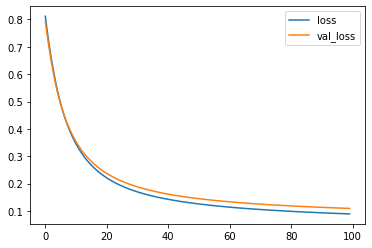

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

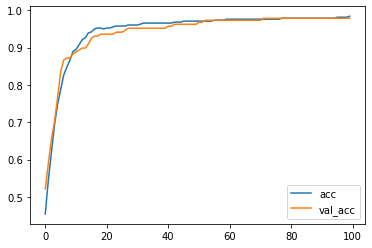

In [23]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend();

## Part 2

In [25]:
P=model.predict(X_test)
print(P)

6/6 [==============================] - 0s 2ms/step
[[9.66716886e-01]
 [9.46959078e-01]
 [9.99944150e-01]
 [9.61188316e-01]
 [8.92957509e-01]
 [5.37971616e-01]
 [3.19108009e-01]
 [9.93565738e-01]
 [6.11798977e-03]
 [3.49850893e-01]
 [6.52739778e-02]
 [9.84697580e-01]
 [9.07613058e-03]
 [9.98330414e-01]
 [9.96664464e-01]
 [1.21905487e-06]
 [9.93204474e-01]
 [8.77062231e-02]
 [1.97647652e-03]
 [1.59137130e-01]
 [9.97791827e-01]
 [8.66995566e-03]
 [2.07406431e-01]
 [9.41336632e-01]
 [7.55848169e-01]
 [9.91778433e-01]
 [9.87869203e-01]
 [9.80161786e-01]
 [4.18137200e-02]
 [7.77207911e-01]
 [7.82967925e-01]
 [9.96542275e-01]
 [3.49163264e-01]
 [8.57880771e-01]
 [2.02932406e-05]
 [8.19256842e-01]
 [9.50151384e-01]
 [9.94347394e-01]
 [9.98273432e-01]
 [9.86529291e-01]
 [1.89693543e-04]
 [8.52200150e-01]
 [9.33360100e-01]
 [1.40297553e-02]
 [1.96636785e-02]
 [9.99033391e-01]
 [4.42681164e-01]
 [9.98741388e-01]
 [9.96404231e-01]
 [1.16596349e-01]
 [8.60769418e-04]
 [9.99112844e-01]
 [2.22026298e

In [26]:
import numpy as np
P=np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.]


In [27]:
print('Manually calculated accuracy ',np.mean(P==y_test))
print('Evaluated accuracy ',model.evaluate(X_test,y_test))

Manually calculated accuracy  0.9787234042553191
6/6 [==============================] - 0s 4ms/step - loss: 0.1091 - accuracy: 0.9787
Evaluated accuracy  [0.10911804437637329, 0.978723406791687]
